In [18]:
import json
import pandas as pd

with open('data.json', 'r') as f:
    data = json.load(f)

In [19]:
with open('data.csv', 'w') as f:
    f.write("username,comment,didDonate,currency,amount\n")
    for item in data:        
        comment_content=item['comment'].replace(','," ").replace("\n"," ").replace("\r"," ")
        if item['super_thanks_amount']=='':
            donated=False
            amount=0
            currency=None
        else:
            donated=True
            amount=item['super_thanks_amount'][1:].replace(',','')
            currency=item['super_thanks_amount'][0]
        f.write("{},{},{},{},{}\n".format(item['author'],comment_content,donated,currency,amount))        

In [27]:
df=pd.read_csv('data.csv')
set(df['currency'].dropna().tolist())

{'$', '₹'}

In [36]:
donation_stats={
    "amount_usd":0,
    "amount_usd_qty":0,
    "amount_inr":0,    
    "amount_inr_qty":0
}
donation_stats['amount_usd']=sum(df[df['currency']=="$"]['amount'].tolist())
donation_stats['amount_usd_qty']=len(df[df['currency']=="$"]['amount'].tolist())
donation_stats['amount_inr']=sum(df[df['currency']=="₹"]['amount'].tolist())
donation_stats['amount_inr_qty']=len(df[df['currency']=="₹"]['amount'].tolist())
donation_stats

{'amount_usd': 109.99,
 'amount_usd_qty': 3,
 'amount_inr': 21576.0,
 'amount_inr_qty': 22}

In [43]:
total_inr=donation_stats['amount_usd']*85.39+donation_stats['amount_inr']
total_usd=donation_stats['amount_usd']+donation_stats['amount_inr']/85.39
print(f"₹{total_inr:.2f},${total_usd:.2f}")

₹30968.05,$362.67


In [ ]:
from textblob import TextBlob

sentiment_scores=[]
for index,comment in enumerate(df['comment']):    
    blob=TextBlob(str(comment))
    sentiment_score=blob.sentiment.polarity    
    sentiment_scores.append(sentiment_score)
sentiment_scores=pd.Series(sentiment_scores)
sentiment_scores.describe()

count    1098.000000
mean        0.132378
std         0.326732
min        -1.000000
25%         0.000000
50%         0.056004
75%         0.308949
max         1.000000
dtype: float64

In [104]:
scores=sentiment_scores.describe().to_dict()
mean_score=((scores['mean']+1)/2)*100
postive=len(list(filter(lambda x:x>0.1,sentiment_scores.to_list())))/len(sentiment_scores)*100
negative=len(list(filter(lambda x:x<-0.1,sentiment_scores.to_list())))/len(sentiment_scores)*100
neutral=len(list(filter(lambda x:x<=0.1 and x>=-0.1,sentiment_scores.to_list())))/len(sentiment_scores)*100
print(postive,negative,neutral)


45.173041894353375 15.027322404371585 39.799635701275044


In [ ]:
import spacy
from collections import Counter
import pandas as pd
import re

import en_core_web_sm
nlp = en_core_web_sm.load()

comments = ' '.join(df['comment'].dropna().tolist()).lower()
comments = re.sub(r'[^a-z\s]', '', comments) 

spacy_stopwords = nlp.Defaults.stop_words

words = comments.split()
filtered_words=[word for word in words if word not in spacy_stopwords and len(word)>3]

word_freq = Counter(filtered_words)
top_words = word_freq.most_common(50)


[('game', 650),
 ('like', 327),
 ('good', 197),
 ('india', 178),
 ('indian', 175),
 ('looks', 157),
 ('games', 151),
 ('dont', 148),
 ('great', 119),
 ('work', 117),
 ('sekiro', 112),
 ('hope', 97),
 ('gameplay', 93),
 ('best', 88),
 ('team', 88),
 ('people', 80),
 ('love', 77),
 ('story', 76),
 ('graphics', 74),
 ('guys', 67),
 ('better', 65),
 ('gaming', 64),
 ('look', 63),
 ('play', 61),
 ('time', 61),
 ('quality', 59),
 ('character', 57),
 ('world', 56),
 ('high', 55),
 ('want', 54),
 ('amazing', 54),
 ('combat', 53),
 ('looking', 52),
 ('feel', 52),
 ('things', 52),
 ('know', 52),
 ('souls', 52),
 ('mechanics', 50),
 ('need', 49),
 ('varun', 48),
 ('making', 48),
 ('cant', 46),
 ('wukong', 45),
 ('think', 43),
 ('video', 40),
 ('environment', 40),
 ('feels', 39),
 ('slums', 38),
 ('thing', 38),
 ('support', 37)]

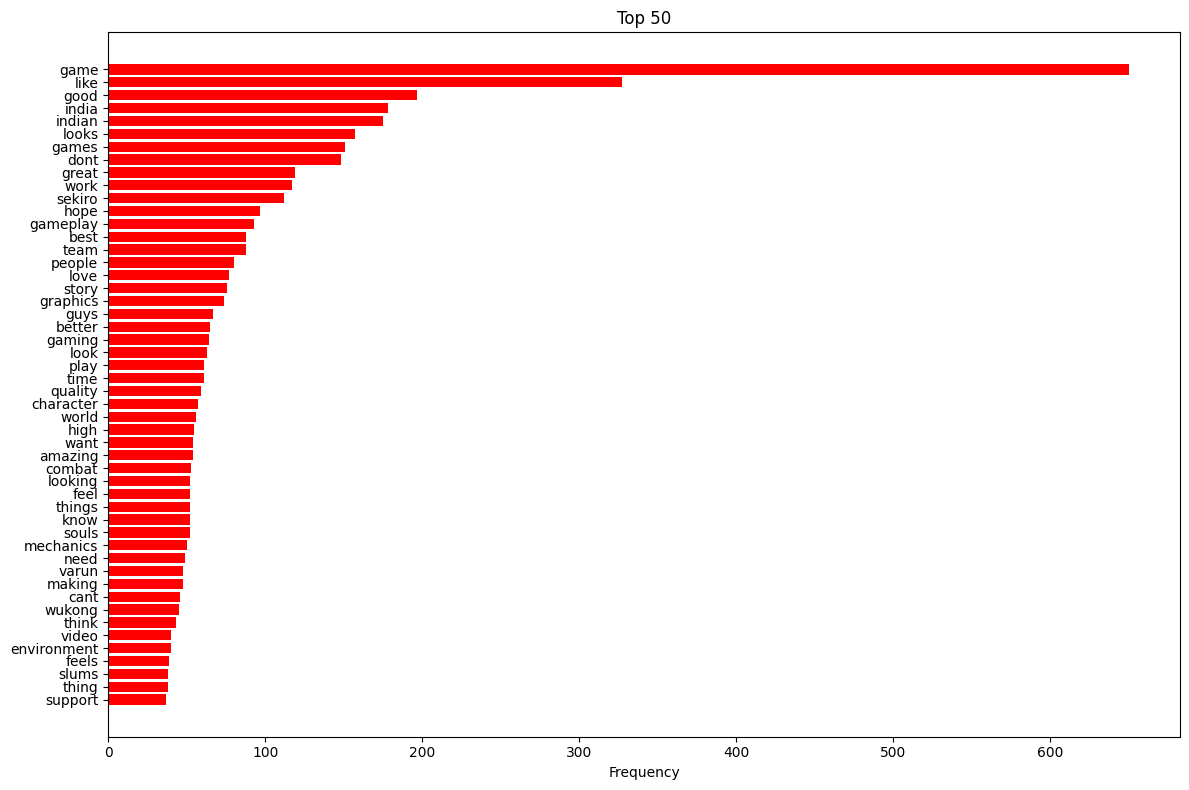

In [81]:
import matplotlib.pyplot as plt

words, counts = zip(*top_words)

plt.figure(figsize=(12, 8))
plt.barh(words[::-1], counts[::-1], color='red')
plt.xlabel("Frequency")
plt.title("Top 50")
plt.tight_layout()
plt.show()


('game',
 'like',
 'good',
 'india',
 'indian',
 'looks',
 'games',
 'dont',
 'great',
 'work',
 'sekiro',
 'hope',
 'gameplay',
 'best',
 'team',
 'people',
 'love',
 'story',
 'graphics',
 'guys',
 'better',
 'gaming',
 'look',
 'play',
 'time',
 'quality',
 'character',
 'world',
 'high',
 'want',
 'amazing',
 'combat',
 'looking',
 'feel',
 'things',
 'know',
 'souls',
 'mechanics',
 'need',
 'varun',
 'making',
 'cant',
 'wukong',
 'think',
 'video',
 'environment',
 'feels',
 'slums',
 'thing',
 'support')

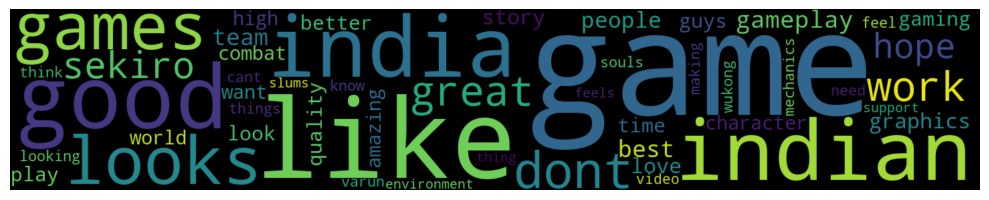

In [110]:
from wordcloud import WordCloud
frequencies = dict(zip(words, counts))

wc = WordCloud(
    width=1450,
    height=270,    
).generate_from_frequencies(frequencies)
wc.to_file("wordcloud.png")
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()